##### Importing Modules

In [1]:
from Groups import *
from matplotlib.pyplot import *
from time import time

### Usage

#### General usage using $ D_3 $

In [2]:
G = DihegralGroup(3)

In [3]:
G

Group(e,r^1,r^2,s,sr^1,sr^2)

In [4]:
x = G.Element(1)
y = G.Element(2)
x,y,x*y

(r^1, r^2, e)

In [5]:
R = G.R
R

    	   e	r^1	r^2	s	sr^1	sr^2	
    	   -	---	---	-	----	----	
e	|  e	r^1	r^2	s	sr^1	sr^2	
r^1	|  r^1	r^2	e	sr^2	s	sr^1	
r^2	|  r^2	e	r^1	sr^1	sr^2	s	
s	|  s	sr^1	sr^2	e	r^1	r^2	
sr^1	|  sr^1	sr^2	s	r^2	e	r^1	
sr^2	|  sr^2	s	sr^1	r^1	r^2	e	

In [6]:
R.T # The Calley table

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 0, 5, 3, 4],
       [2, 0, 1, 4, 5, 3],
       [3, 4, 5, 0, 1, 2],
       [4, 5, 3, 2, 0, 1],
       [5, 3, 4, 1, 2, 0]], dtype=int32)

In [7]:
R.Elements # The elements that the Relation is operating over

['e', 'r^1', 'r^2', 's', 'sr^1', 'sr^2']

In [8]:
H = R.generate([1])
H

Group(e,r^1,r^2)

In [9]:
C = Coset(H,2)
C

(r^2 * Group(e,r^1,r^2))

In [10]:
[R[i] for i in C.expand()]

['r^2', 'e', 'r^1']

In [11]:
G.Cosets(H)

[(e * Group(e,r^1,r^2)), (s * Group(e,r^1,r^2))]

In [12]:
N = G.MinimumNormalSubGroup()
N

Group(e,r^1,r^2)

In [13]:
G/N

Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))

In [14]:
gen = G.MinimalGeneratingSet()
assert G.R.generate(gen) == G
for i in range(len(gen)):
    assert G.R.generate(gen[:i]+gen[i+1:]) != G

In [15]:
gen = G.MinimumGeneratingSet(False)
gen

[3, 1]

In [16]:
G_g = R.generate(gen)
G_g

Group(e,r^1,r^2,s,sr^1,sr^2)

#### $ Z_2^2 $

In [17]:
Z = AdditiveGroupOnIntegersModulo(2)
Z2 = Z**2
Z2

Group((0, 0),(0, 1),(1, 0),(1, 1))

In [18]:
gen = Z2.MinimumGeneratingSet(debug=False)
[Z2.R[g] for g in gen]

[(1, 0), (0, 1)]

#### $ A_5 $

In [19]:
A5 = AlternatingGroup(5)
A5

Group(
[01234],
[01342],
[01423],
[02143],
[02314],
[02431],
[03124],
[03241],
[03412],
[04132],
[04213],
[04321],
[10243],
[10324],
[10432],
[12034],
[12340],
[12403],
[13042],
[13204],
[13420],
[14023],
[14230],
[14302],
[20134],
[20341],
[20413],
[21043],
[21304],
[21430],
[23014],
[23140],
[23401],
[24031],
[24103],
[24310],
[30142],
[30214],
[30421],
[31024],
[31240],
[31402],
[32041],
[32104],
[32410],
[34012],
[34120],
[34201],
[40123],
[40231],
[40312],
[41032],
[41203],
[41320],
[42013],
[42130],
[42301],
[43021],
[43102],
[43210])

In [20]:
gen = A5.MinimumGeneratingSet(False)
[A5.R[g] for g in gen]

['[01342]', '[12034]']

#### $ Z_3 \times S_3 $

In [21]:
def Z_p_S_q(q,p=3):
    Z = AdditiveGroupOnIntegersModulo(p)
    S = PermutationGroup(q)
    ZS = Z.Cross(S)
    return ZS
ZS = Z_p_S_q(3,3)

In [22]:
print(ZS)
print("Minimum generating set")
print([ZS.R[i] for i in ZS.MinimumGeneratingSet()])

Group(
(0, '[012]'),
(0, '[021]'),
(0, '[102]'),
(0, '[120]'),
(0, '[201]'),
(0, '[210]'),
(1, '[012]'),
(1, '[021]'),
(1, '[102]'),
(1, '[120]'),
(1, '[201]'),
(1, '[210]'),
(2, '[012]'),
(2, '[021]'),
(2, '[102]'),
(2, '[120]'),
(2, '[201]'),
(2, '[210]'))
Minimum generating set
[(1, '[021]'), (0, '[102]')]


### Complexity Analysis

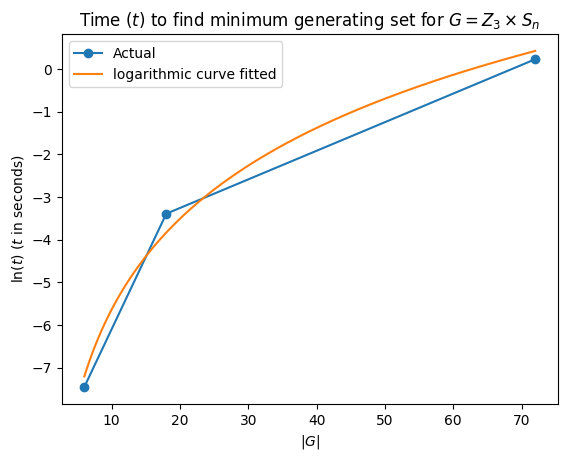

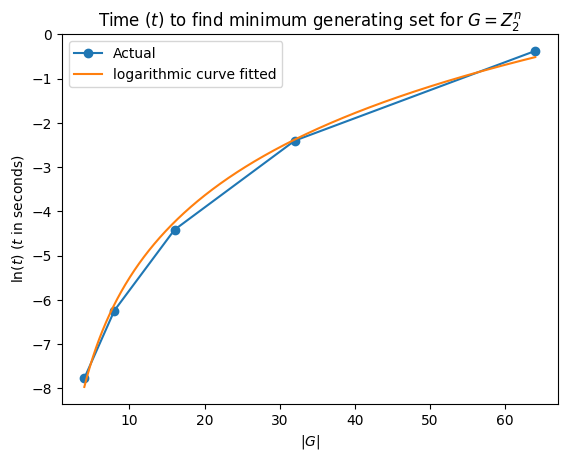

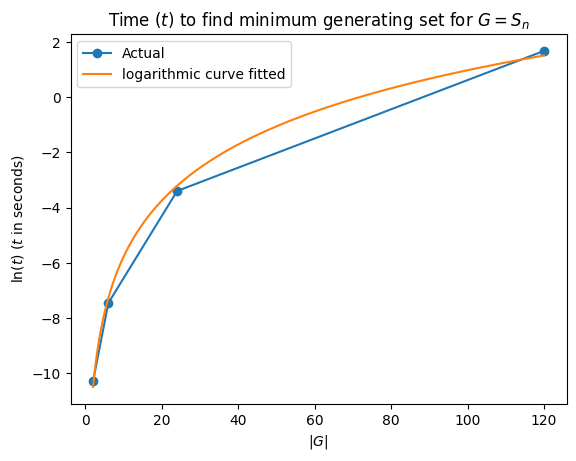

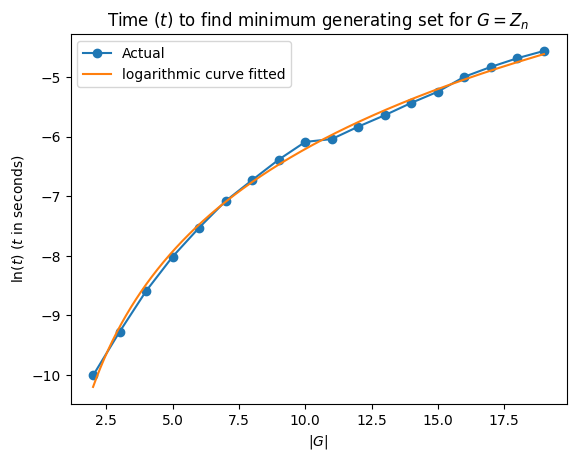

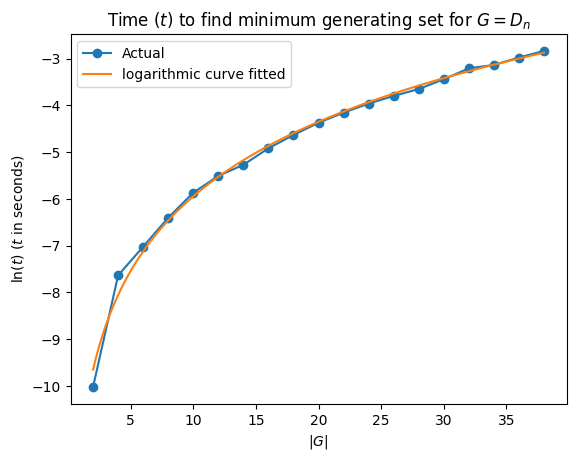

In [23]:
def Z_p_to_n(n,p=2):
    Z = AdditiveGroupOnIntegersModulo(p)
    Z_to_n = Z**n
    assert Z_to_n is not None
    return Z_to_n
D = {
    Z_p_S_q:(5,2,1,2,r"Z_3\times S_n"),
    Z_p_to_n:(7,2,1,5,"Z_2^n"),
    PermutationGroup:(6,2,1,2,'S_n'),
    AdditiveGroupOnIntegersModulo:(20,2,1,10,'Z_n'),
    DihegralGroup:(20,1,1,10,'D_n')
}
for Gfunc in D:
    N,N0,d,iterations,name = D[Gfunc]
    figure()

    y = []
    x = []
    for n in range(N0,N,d):
        G = Gfunc(n)
        assert G is not None
        to = time()
        for _ in range(iterations):
            g = G.MinimumGeneratingSet()
            Gg = G.R.generate(g)
            if not G == Gg:
                print("oof")
                break
        y.append((time()-to)/iterations)
        x.append(len(G))
    y = log(array(y))
    x = array(x)
    plot(x,y,'-o')

    # Curve fitting
    Ln = log(x)
    X = array([[ln,1] for ln in Ln])
    XT = X.T
    XTX = X.T @ X
    XTXi = linalg.inv(XTX)
    pseudo_inverse = XTXi @ XT
    theta = dot(pseudo_inverse,y)
    a,b = theta
    x = linspace(x[0],x[-1],1000)
    Ln = log(x)
    L_pred = Ln*a + b
    plot(x,L_pred)

    xlabel("$ |G| $")
    ylabel("$\ln(t)$ ($ t $ in seconds)")
    title(f"Time ($ t $) to find minimum generating set for $ G = {name} $")
    legend(["Actual",f"logarithmic curve fitted"])

## Misc

In [24]:
M1 = [
"a| a b c d e f g h",
"b| b a e f c d h g",
"c| c h a g f e d b",
"d| d f g a h b c e",
"e| e g b h d c f a",
"f| f d h b g a e c",
"g| g e d c b h a f",
"h| h c f e a g b d",
]
M2 = [
"aa| aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax ay az ba",
"ab| ab ae af ag aa ak al am an ao ac ad ar as at au av ah ai aj ax ay az ap aq ba aw",
"ac| ac an ah ai ay au av aa ap aq ba ak ag az af ad aw at ar as ao am aj ae ax ab al",
"ad| ad ag ai aj al an ao ap aq aa as at au av ab aw ac ax ay ae az af ah ba ak am ar",
"ae| ae aa ak al ab ac ad ar as at af ag ah ai aj ax ay am an ao ap aq ba au av aw az",
"af| af as am an aq ax ay ab au av aw ac al ba ak ag az aj ah ai at ar ao aa ap ae ad",
"ag| ag al an ao ad as at au av ab ai aj ax ay ae az af ap aq aa ba ak am aw ac ar ah",
"ah| ah az aa ap ax ao am ac ad aw al ba av ab au ai aj as at ar af ag aq ay ae an ak",
"ai| ai av ap aq ak az af ad aw ac ar as ao am an aj ah ae ax ay ab au aa al ba ag at",
"aj| aj ao aq aa at av ab aw ac ad ay ae az af ag ah ai ba ak al am an ap ar as au ax",
"ak| ak ai ar as av ap aq ae ax ay az af ad aw ac al ba ao am an aj ah at ab au aa ag",
"al| al ad as at ag ai aj ax ay ae an ao ap aq aa ba ak au av ab aw ac ar az af ah am",
"am| am ba ab au ap at ar af ag az ad aw ay ae ax an ao ai aj ah ak al av aq aa as ac",
"an| an ay au av ac ba ak ag az af ah ai at ar as ao am aa ap aq ae ax ab ad aw al aj",
"ao| ao at av ab aj ay ae az af ag aq aa ba ak al am an aw ac ad ar as au ah ai ax ap",
"ap| ap am ad aw ba ab au ai aj ah at ar af ag az aq aa ay ae ax an ao ac ak al av as",
"aq| aq af aw ac as am an aj ah ai ax ay ab au av aa ap al ba ak ag az ad at ar ao ae",
"ar| ar aw ae ax au aj ah ak al ba ag az aq aa ap as at an ao am ac ad ay av ab ai af",
"as| as aq ax ay af aw ac al ba ak am an aj ah ai at ar ab au av aa ap ae ag az ad ao",
"at| at aj ay ae ao aq aa ba ak al av ab aw ac ad ar as az af ag ah ai ax am an ap au",
"au| au ar ag az aw ae ax an ao am aj ah ak al ba av ab aq aa ap as at af ac ad ay ai",
"av| av ak az af ai ar as ao am an ap aq ae ax ay ab au ad aw ac al ba ag aj ah at aa",
"aw| aw au aj ah ar ag az aq aa ap ae ax an ao am ac ad ak al ba av ab ai as at af ay",
"ax| ax ah al ba az aa ap as at ar ao am ac ad aw ay ae av ab au ai aj ak af ag aq an",
"ay| ay ac ba ak an ah ai at ar as au av aa ap aq ae ax ag az af ad aw al ao am aj ab",
"az| az ax ao am ah al ba av ab au aa ap as at ar af ag ac ad aw ay ae an ai aj ak aq",
"ba| ba ap at ar am ad aw ay ae ax ab au ai aj ah ak al af ag az aq aa as an ao ac av",
]

In [25]:
def formatStr(s):
    a,b = s.split("| ")
    b = b.split(" ")
    return (a,b)
def formatM(M):
    M = [formatStr(s) for s in M]
    D = {M[i][0]:i for i in range(len(M))}
    Mnew = []
    for row in M:
        y = row[1]
        Mnew.append([D[s] for s in y])
    T = array(Mnew)
    names = [M[i][0] for i in range(len(M))]
    R = Relation(T,names)
    return R

In [26]:
G = Group(formatM(M1))
print("Calley Table for Heisenberg(1,2):")
print(G.R)
print("Minimum Generating set")
print([G.R[i] for i in G.MinimumGeneratingSet()])
print('\n')
G = Group(formatM(M2))
print("Calley Table for Heisenberg(1,3):")
print(G.R)
print("Minimum Generating set")
print([G.R[i] for i in G.MinimumGeneratingSet()])

Calley Table for Heisenberg(1,2):
 	   a	b	c	d	e	f	g	h	
 	   -	-	-	-	-	-	-	-	
a	|  a	b	c	d	e	f	g	h	
b	|  b	a	e	f	c	d	h	g	
c	|  c	h	a	g	f	e	d	b	
d	|  d	f	g	a	h	b	c	e	
e	|  e	g	b	h	d	c	f	a	
f	|  f	d	h	b	g	a	e	c	
g	|  g	e	d	c	b	h	a	f	
h	|  h	c	f	e	a	g	b	d	
Minimum Generating set
['c', 'b']


Calley Table for Heisenberg(1,3):
  	   aa	ab	ac	ad	ae	af	ag	ah	ai	aj	ak	al	am	an	ao	ap	aq	ar	as	at	au	av	aw	ax	ay	az	ba	
  	   --	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	--	
aa	|  aa	ab	ac	ad	ae	af	ag	ah	ai	aj	ak	al	am	an	ao	ap	aq	ar	as	at	au	av	aw	ax	ay	az	ba	
ab	|  ab	ae	af	ag	aa	ak	al	am	an	ao	ac	ad	ar	as	at	au	av	ah	ai	aj	ax	ay	az	ap	aq	ba	aw	
ac	|  ac	an	ah	ai	ay	au	av	aa	ap	aq	ba	ak	ag	az	af	ad	aw	at	ar	as	ao	am	aj	ae	ax	ab	al	
ad	|  ad	ag	ai	aj	al	an	ao	ap	aq	aa	as	at	au	av	ab	aw	ac	ax	ay	ae	az	af	ah	ba	ak	am	ar	
ae	|  ae	aa	ak	al	ab	ac	ad	ar	as	at	af	ag	ah	ai	aj	ax	ay	am	an	ao	ap	aq	ba	au	av	aw	az	
af	|  af	as	am	an	aq	ax	ay	ab	au	av	aw	ac	al	ba	ak	ag	az	aj	